# Data Mining Assignment 2_NN

## Student Details

Student Name and ID of the member submitting the assignment: Sai Sandeep Gottipati 1001944726. 

Student Name and ID of the remaining members: Sreya Kotha 1002007076

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
**10 points per question will be deducted incase you fail to do so**
<br>**DO NOT DELETE THIS CELL**<br>
#### Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.

 * Load pima-indians-diabetes dataset from sklearn datasets. Output/prediction variable is 'class'[1 points]
 * while selecting best 3 attributes for training,validating and testing your model. [2 points]
 * Find the best K. [3 points]
 * Split your dataset - 60% for training set, 20% for Validation set and 20% for testing set the classifier. Use random state as 2022 [2 points]
 * Use minkowski distance.[1 points]
 * Test the classifier with three different numbers for neighbors and record the results for training, validation and testing. Show the best one.[3 points]
 * Use comments to explain your code and variable names.[4 points]
 * Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers.[6 points]
 * Plot the classifier in a 2D projection.[3 points]

In [11]:
#importing the required modules
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
 

In [12]:
#loading the dataset
df =pd.read_csv('pima-indians-diabetes.csv') 
df.head() #printing the first 5 values of the dataset


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
#values of pressure mass and Plasma and skin cannot be zero so in this i cleaned the dataframe. 
#PreProcessing 
zero_not_accepted=['Pres','mass','Plas','skin'] 
for column in zero_not_accepted:
    df[column]=df[column].replace(0,np.NaN)
    mean=int(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.NaN,mean)

In [14]:
#selecting the best 3 features using the selectKBest algorithm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X=df.iloc[:,0:8] #selecting  the columns except the target
y=df.iloc[:,8]   #selecting the target column
BestFeatures = SelectKBest(score_func=chi2, k=3)
fit = BestFeatures.fit(X,y)#fitting according to the data
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
f_Scores = pd.concat([df_columns,df_scores],axis=1) #creating a new columns
f_Scores.columns = ['columns','Score'] 
f_Scores 
print(f_Scores.nlargest(3,'Score'))#getting the columns with highest score.

  columns        Score
4    test  2175.565273
1    Plas  1418.666546
7     age   181.303689


In [15]:
#split dataset according to the given ratio 
X=df[['test','Plas','age']] #selecting the specified columns 
y=df.iloc[:,8] #assigning the target column to the y variable
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2022,test_size=0.2) #testing and training split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=2022) #training and validation split

In [16]:
#length of  the train,test and validation data
print(len(X_train))
print(len(y_test))
print(len(y_val))

491
154
123


In [17]:
#Standardize features by removing the mean and scaling to unit variance.
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
X_val=sc_X.fit_transform(X_val)


154


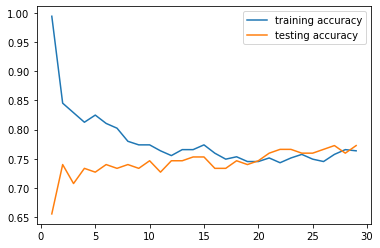

In [18]:

training_accuracy=[]
test_accuracy=[]
#calculating the testing and training accuracy for the values of k to select the bestK value in range of 1 to 30.
neighbors=range(1,30)
for n in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=n,p=2,metric='minkowski')#using the KNN Classifier with minkowski distance as metirc
    classifier.fit(X_train,y_train)
    training_accuracy.append(classifier.score(X_train,y_train))
    test_accuracy.append(classifier.score(X_test,y_test))
#plotting the training accuracy and testing accuracy

import matplotlib.pyplot as plt  
plt.plot(neighbors,training_accuracy,label='training accuracy')
plt.plot(neighbors,test_accuracy,label='test accuracy')
plt.legend(['training accuracy','testing accuracy'])

In [19]:
#from the above graph we can see that a maximum accuracy is acheived when the k=27 

classifier=KNeighborsClassifier(n_neighbors=27,p=2,metric='minkowski')#calling the KNN classifier.
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=27)

In [24]:
#predicting the values of the classifier to get the confusion matrix between testing data and prediction data
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
print("accuracy_score:",accuracy_score(y=_test,y_pred))
print(classification_report(y_test,y_pred,target_names=['no sugar','sugar']))

accuracy_score: 0.7727272727272727
              precision    recall  f1-score   support

    no sugar       0.81      0.89      0.85       108
       sugar       0.66      0.50      0.57        46

    accuracy                           0.77       154
   macro avg       0.73      0.69      0.71       154
weighted avg       0.76      0.77      0.76       154



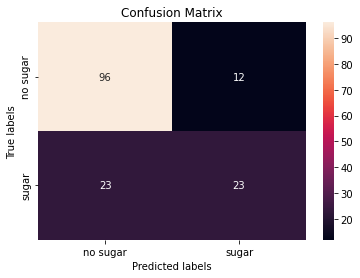

In [23]:
   

ax= plt.subplot()
#using the sns seaborn to get the heatmap to plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['no sugar', 'sugar']); ax.yaxis.set_ticklabels(['no sugar', 'sugar']);


accuracy_score: 0.7337662337662337
              precision    recall  f1-score   support

    no sugar       0.79      0.85      0.82       108
       sugar       0.57      0.46      0.51        46

    accuracy                           0.73       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.72      0.73      0.72       154



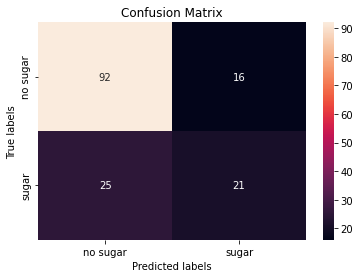

In [35]:
#using the KNN classifier with 10 neighbours and using minkowski as the metric
classifier1=KNeighborsClassifier(n_neighbors=17,p=2,metric='minkowski')#calling the KNN classifier.
classifier1.fit(X_train,y_train)
y_pred1=classifier1.predict(X_test) #predicting the values of the classifier
cm1=confusion_matrix(y_test,y_pred1)

print("accuracy_score:",accuracy_score(y_test,y_pred1))# getting the accuracy score when k=10.
print(classification_report(y_test,y_pred1,target_names=['no sugar','sugar'])) #printing the classification report 
ax= plt.subplot()
#using the sns seaborn to get the heatmap to plot confusion matrix
sns.heatmap(cm1, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['no sugar', 'sugar']); ax.yaxis.set_ticklabels(['no sugar', 'sugar']);

accuracy_score: 0.7402597402597403
              precision    recall  f1-score   support

    no sugar       0.79      0.86      0.82       108
       sugar       0.58      0.46      0.51        46

    accuracy                           0.74       154
   macro avg       0.69      0.66      0.67       154
weighted avg       0.73      0.74      0.73       154



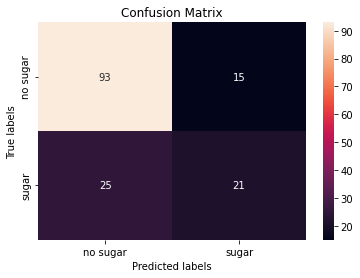

In [36]:
#using the KNN classifier with 10 neighbours and using minkowski as the metric
classifier2=KNeighborsClassifier(n_neighbors=8,p=2,metric='minkowski')#calling the KNN classifier.
classifier2.fit(X_train,y_train)
y_pred2=classifier2.predict(X_test) #predicting the values of the classifier
cm2=confusion_matrix(y_test,y_pred2)

print("accuracy_score:",accuracy_score(y_test,y_pred2))# getting the accuracy score when k=10.
print(classification_report(y_test,y_pred2,target_names=['no sugar','sugar'])) #printing the classification report 
ax= plt.subplot()
#using the sns seaborn to get the heatmap to plot confusion matrix
sns.heatmap(cm2, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['no sugar', 'sugar']); ax.yaxis.set_ticklabels(['no sugar', 'sugar']);

## Report (23 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
* Explain all the preprocessing done in detail.[4 points]
* Explain all the parameters of KNN in details in your own words. Do not copy paste. Give references. 10 Points will be deducted if you copy paste from the internet. [5 points]
* Explain what was your criteria for selecting the three attributes. [5 points]
* Visualizations of the classifier in a 2D projection, and write your observations. [4 points]
* Interprete and compare the results explain in details.[5 points]

Do not to forget to cite your sources!